# Distribution of Average Lifetimes
 >__Created__: Harrison B. Prosper, May 15 2024 for INFN SOS 2024, Paestum, Italy
 
 In this notebook, we investigate the density of the sample average 
 \begin{align}
     z & = g(t_1,\cdots,t_n) = \frac{1}{n} \sum_{j=1}^n t_j 
 \end{align}
 of $n$ lifetimes $t_j$, $j=1,\cdots, n$ measured without error where $t_j \sim \text{Exp}(\tau) = \exp(-t / \tau) \, / \, \tau$ with $t \in \mathbb{R}^+$ and the density of the estimator $y = 1 / z$ of the decay rate $\lambda = 1 / \tau$ (see Glen Cowan's INFN SOS 2024 lecture slides). 

According to the random variable theorem [1],

\begin{align*}
p(z) &= \int_{0}^{\infty} \cdots  \int_{0}^{\infty} \delta(z - g(t_1,\cdots, c_n)) \, f(t_1,\cdots, t_n) \, dt_1 \cdots dt_n , \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} d\omega \, e^{i\omega z - i\omega g} \int_{0}^{\infty} \cdots  \int_{0}^{\infty} f(t_1,\cdots, t_n) \, dt_1 \cdots dt_n , \text{ using } \delta(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{i \omega x} \, d\omega, 
\text{ where}\\
 f(t_1,\cdots, t_n) & = \prod_{j=1}^n \exp(-t_j / \tau) \, / \, \tau . 
\end{align*}

Therefore,
\begin{align}
p(z) 
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} d\omega \, e^{i\omega z} \prod_{j=1}^n \frac{1}{\tau} \int_{0}^{\infty} e^{-(i\omega  / n + 1/\tau) t_j} \, d t_j , \\
&= \frac{1}{2\pi} \int_{-\infty}^{\infty} d\omega \, e^{i\omega z} \prod_{j=1}^n \frac{1}{\tau} \frac{1}{(i\omega  / n + 1/\tau)}\int_{0}^{\infty} e^{-(i\omega  / n + 1/\tau) t_j} \, d (i\omega  / n + 1/\tau) t_j , \\
&= \frac{1}{2\pi i} \int_{-\infty}^{\infty} d\omega \, e^{i\omega z}  \left[\frac{i}{\tau^n (i\omega  / n + 1/\tau)^n} \right], \\
&= \frac{1}{2\pi i} \int_{-\infty}^{\infty} d\omega \, e^{i\omega z}  \left[ \frac{i}{( i \tau / n)^n (\omega - i n /\tau)^n} \right] .
\end{align}
Given an integral of the form
\begin{align}
    p(z) = I(z) & = \frac{1}{2\pi i} \int_{-\infty}^{\infty} e^{i\omega z} F(\omega) \, d\omega,
\end{align}
we can use the residue theorem for a simple pole at $\omega = \omega_0$ of order $n$ 
\begin{align}
    p(z) & = \lim_{\omega \rightarrow \omega_0} \frac{1}{(n-1)!} \frac{d^{n-1}}{d\omega^{n-1}} e^{i \omega z} \, (\omega - \omega_0)^n F(\omega) .
\end{align}
to evaluate the integral. This yields
\begin{align}
    p(z) & = \frac{1}{(n-1)!} (i z)^{n-1} e^{i \omega_0 z}  \left[ \frac{i}{( i \tau / n)^n} \right] , \quad\text{where } \omega_0 = i n / \tau , \\
        & = \frac{1}{\Gamma(n)}  e^{-  z / \tau / n }  \left(\frac{ z}{\tau/n} \right)^{n-1} \frac{ 1 }{\tau/n} . 
\end{align}
This is just a gamma density 
$$f(x, \alpha, \delta) =
       \left(\frac{x}{\delta}\right)^{\alpha - 1} \frac{e^{- x / \delta }}{\Gamma(\alpha)} \frac{1}{\delta}, $$
with location parameter zero and scale parameter $\delta = \tau / n$.

If instead we wish to estimate the decay rate $\lambda = 1 / \tau$, we might try the maximum likelihood estimate $\hat{\lambda} = y = 1 / z$. Its density, an inverse gamma, 
\begin{align}
f(y) & = \frac{1}{\Gamma(n)} \left(\frac{n \lambda}{y} \right)^{n-1} \, e^{-n \lambda / y} \left(\frac{n \lambda}{y} \right)^2  \frac{1}{n \lambda} ,
\end{align}
follows directly from that for the sample average $z$ of the lifetimes.

  1. D. Gillespie, *A theorem for physicists in the theory of random variables*, Am. J. of Phys. 51, 520 (1983).

In [1]:
# standard system modules
import os, sys

# standard array manipulation module
import numpy as np

# standard scientific computing module
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate

# standard symbolic algebra module
import sympy as sm
sm.init_printing()

# standard plotting module
import matplotlib as mp
import matplotlib.pyplot as plt

# arbitrary precision real and complex calculation
#import mpmath

# make plots appear inline
%matplotlib inline

In [2]:
# update fonts
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14
        }
mp.rc('font', **font)
mp.rc('xtick', labelsize='x-small')
mp.rc('ytick', labelsize='x-small')
# set usetex = False if latex not available on your machine
mp.rc('text', usetex=True)  # Use local Latex compiler

# set a seed to ensure reproducibility 
# on a given machine
seed = 111
rnd = np.random.RandomState(seed)

### Generate $z = \frac{1}{n} \sum_{j=1}^n t_i, \quad y = 1 / z$

In [3]:
ZMIN = 0.0      
ZMAX = 10.0
 
n = n0 = 5 
m = 1000000
N = n*m

tau = np.pi       # mean lifetime
lda = 1/tau       # mean decay rate
scale = (n-1)/n

# sample averages over n lifetimes (measured without error)
Z = rnd.exponential(tau, n*m).reshape((m,n)).mean(axis=1)

# decay rates: L = 1/Z
L = 1/Z

Z.shape, L.shape

### Histogram $z$ and compare with gamma density


In [4]:
def gamma(z, delta=tau/n0):
    return st.gamma.pdf(z, n0, loc=0, scale=delta)

In [5]:
def plotData(data, 
             nbins=500,  
             xmin=ZMIN, xmax=ZMAX,
             ymin= 0, ymax=0.4,
             ftsize=20, 
             color=(0.1, 0.3, 0.8), 
             fgsize=(6,4)):

    # set size of figure
    plt.figure(figsize=fgsize)
    
    # histogram data
    # returns y, x, o
    # y: counts
    # x: bin boundaries
    # o: objects (not used, hence the use of "_")
    
    y, x, _ = plt.hist(data, 
                       bins=nbins,
                       color=color,
                       alpha=0.20,
                       density=True,
                       range=(xmin, xmax))
    
    # convert bin boundaries to bin centers
    # Note: x[1:]  = x[1], x[2], ..., x[n-1]
    #       x[:-1] = x[0], x[1], ..., x[n-2]
    x = (x[:-1] + x[1:])/2
    f = [gamma(z) for z in x]

    # superimpose Cauchy density
    plt.plot(x, f, color=(1,0,0), lw=2)
    
    # add legends 
    plt.legend(['exact', 
                'by simulation'])
    
    # set up x, y limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    # add x and y labels
    plt.xlabel('$z$', fontsize=ftsize)
    plt.ylabel('$p(z)$', fontsize=ftsize)
    
    # annotate 
    xwid = (xmax-xmin)/10
    ywid = (ymax-ymin)/10
    xpos = xmin + xwid
    ypos = ymin + 8*ywid
    
    #plt.text(xpos, ypos, 
    #         r'$p(t) = \frac{1}{\pi (1 + t^2)}$', 
    #         fontsize=ftsize)
    
    # tighten layout so that image is fully
    # contained within viewport
    plt.tight_layout()
    
    plt.savefig("fig_mean_lifetime.png")
    plt.show()

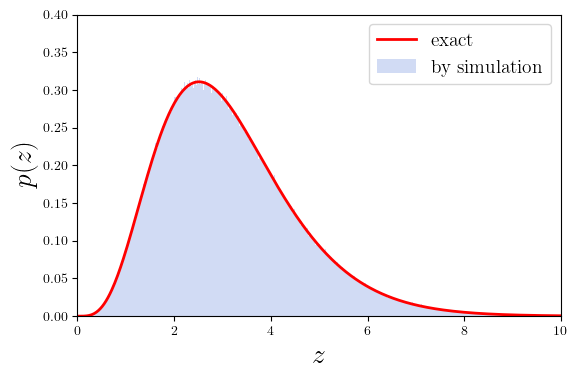

In [6]:
plotData(Z)

### Symbolic representation of inverse gamma density using `sympy`
\begin{align}
f(y) & = \frac{1}{\Gamma(n)} \left(\frac{n \lambda}{y} \right)^{n-1} \, e^{-n \lambda / y} \left(\frac{n \lambda}{y} \right)^2  \frac{1}{n \lambda} ,
\end{align}

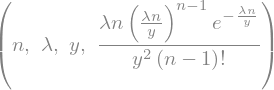

In [7]:
n = sm.symbols('n', integer=True, positive=True)
l, y = sm.symbols('\lambda, y', real=True, positive=True)
F = (n*l/y)**(n-1) * n * l * sm.exp(-n*l/y) / y**2 / sm.factorial(n-1)
n, l, y, F

### Compute moments $\mu_0 = \mathbb{E}[y^0]$, $\mu_1 = \mathbb{E}[y^1]$, and $\mu_2 = \mathbb{E}[y^2]$

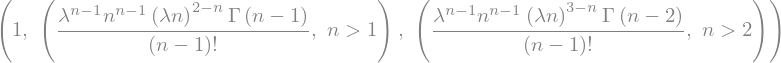

In [8]:
m0 = sm.integrate(F, (y, 0, sm.oo)).simplify()
m1 = sm.integrate(y*F, (y, 0, sm.oo), conds='separate')
m2 = sm.integrate(y**2*F, (y, 0, sm.oo), conds='separate')
m0, m1, m2

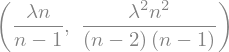

In [9]:
m1 = m1[0].simplify()
m2 = m2[0].simplify()
m1, m2

### Unbiased (non-MLE) estimator $\hat{y}_\text{unbiased} = \hat{y} \, (n-1)/n $
The unbiased estimator for the decay rate will yield first and second moments given by
\begin{align}
    M_1 & = \mu_1 \, \left(\frac{n-1}{n} \right), \\ 
    M_2 & = \mu_2 \, \left(\frac{n-1}{n} \right)^2  .
\end{align}

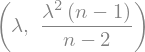

In [10]:
s  = (n-1)/n
M1 = m1*s
M2 = m2 * s**2
M1, M2

### Compute Mean Squared Error (MSE)

By definition,
\begin{align}
    b & = \mathbb{E}[y] - \lambda & \text{ bias}, \\\nonumber\\
    \mathbb{V}[y] & = \mathbb{E}[y^2] - \mathbb{E}^2[y] & \text{ variance}, \\
                & = \mu_2 - \mu_1^2 , \nonumber\\ \nonumber\\
    MSE & = \mathbb{E}[(y - \lambda)^2] & \text{ mean squared error},     \\
        & = b^2 + \mathbb{V}[y]  
\end{align}

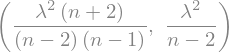

In [11]:
# biased estimator for lambda
b = (m1 - l).simplify() # bias
v = m2 - m1**2          # variance
MSE1 = (b**2 + v).simplify().factor()

# unbiased estimator for lambda
B = 0
V = M2 - M1**2
MSE2 = V.simplify()

MSE1, MSE2

### Compute Ratio of $r = MSE_2 / MSE_1$

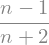

In [14]:
r = (MSE2/MSE1).simplify().factor()
r

In [36]:
MC_MSE1 = ((L - lda)**2).mean()

L_unbiased = scale * L
MC_MSE2 = ((L_unbiased - lda)**2).mean()

R = MC_MSE2/MC_MSE1

print('By MC simulation')
print(f'  L(biased) / lambda:          {L.mean() / lda:6.3f}')
print(f'  L(unbiased) / lambda:        {L_unbiased.mean() / lda:6.3f}')
print(f'  MSE(unbiased) / MSE(biased): {R:6.3f}')
print()
print('Exact')
print(f'  L(biased) / lambda:          {1/s.subs({n:n0}).evalf():6.3f}')
print(f'  MSE(unbiased) / MSE(biased): {r.subs({n:n0}).evalf():6.3f}')

By MC simulation
  L(biased) / lambda:           1.251
  L(unbiased) / lambda:         1.000
  MSE(unbiased) / MSE(biased):  0.571

Exact
  L(biased) / lambda:           1.250
  MSE(unbiased) / MSE(biased):  0.571


### Conclusion
Most of the time a bias correction wastes data in the sense that the MSE of the bias-corrected estimator is larger than that of the biased estimator. However, for the mean decay rate $\lambda = 1 / \tau$ a bias correction reduces the MSE. Therefore, in this case it makes sense to correct the bias because an ensemble of decay rate estimates will be closer on average in the MSE sense to the true value of the decay rate!